In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import smogn 

In [11]:
df = pd.read_csv('features.csv')

x = df.drop(columns=['target','Medu', 'health', 'Dalc', 'Walc', 'traveltime', 
                     'Mjob', 'internet', 'Pstatus', 'goout', 'Fjob', 'guardian', 'activities'])
y = df['target']

df_smogn = x.copy()
df_smogn['target'] = y

df_bal = smogn.smoter(
    data=df_smogn,
    y='target',               
    k=5,                      
    samp_method='extreme'     
)

x_bal = df_bal.drop(columns='target')
y_bal = df_bal['target']

X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

synth_matrix: 100%|#############################| 65/65 [00:00<00:00, 95.80it/s]


In [12]:
gbr = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 6.0162
R²: 0.7317


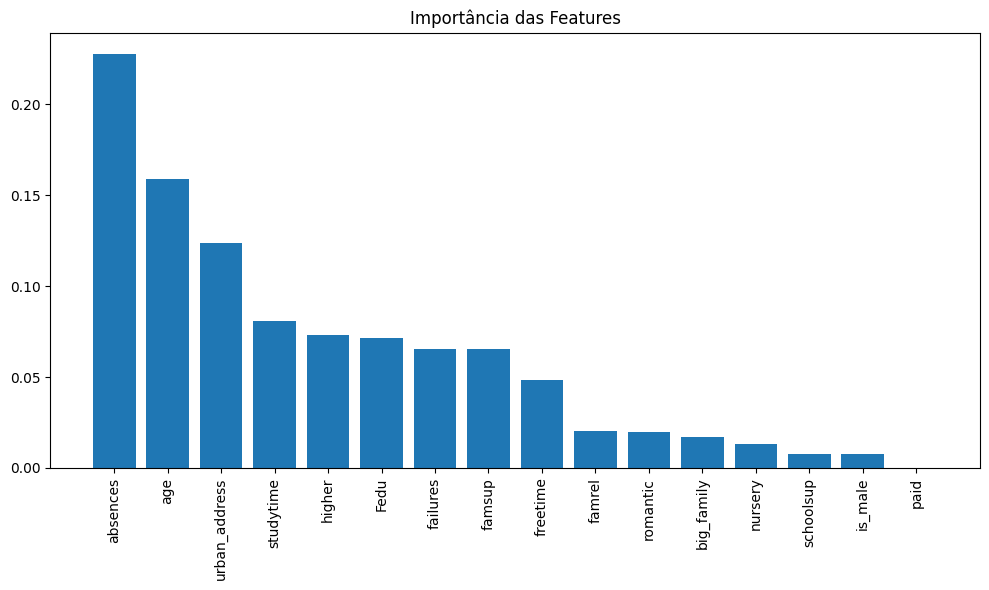

In [15]:
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

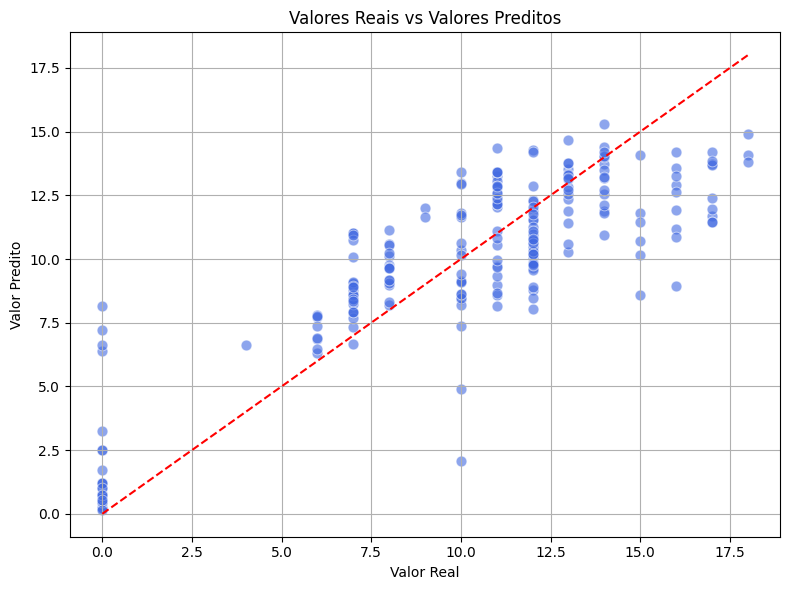

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=60, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valores Reais vs Valores Preditos')
plt.grid(True)
plt.tight_layout()
plt.show()